<a href="https://colab.research.google.com/github/Hiseoi/EwhaML_BicycleSharing/blob/main/%EC%A0%95%EB%A5%98%EC%86%8C%EB%B3%84_%EC%84%B1%EB%8A%A5_%EB%B9%84%EA%B5%90%EB%A5%BC_%ED%86%B5%ED%95%B4_Outlier_%EC%B0%BE%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
data = pd.read_csv("/content/drive/MyDrive/딥인치즈/Data/f5.csv")

In [ ]:
data.head(3)

,month,day,season,time,rainfall,dust,dong,wind,humidity,snow,...,weekday,heat,station_num,station_name,station_place,place,latitude,longitude,installation_date,target
0,1,1,winter,0,0.0,23.0,가락동,1.9,41.0,0.0,...,5.0,-4.76,4453,위례중앙푸르지오 201동 앞,위례중앙푸르지오 201동 앞,위례광장로 290,37.474346,127.143265,2020-12-30,1
1,1,1,winter,0,0.0,23.0,거여동,1.9,41.0,0.0,...,5.0,-4.76,1227,거여역 8번출구 뒤,거여역 8번출구 뒤,서울특별시 송파구 오금로 지하 499,37.493126,127.143822,2017-06-27,1
2,1,1,winter,0,0.0,23.0,거여동,1.9,41.0,0.0,...,5.0,-4.76,4895,위례포레샤인15단지 상가,위례포레샤인15단지 상가,송파구 거여동 604,37.486416,127.142059,2021-11-10,1


In [ ]:
data.drop(['latitude','longitude','installation_date'], axis=1, inplace=True)
jamsil = data[data['dong']=='잠실동']
bangyi = data[data['dong']=='방이동']

In [ ]:
# 동 열 제거
jamsil_data = jamsil.drop(['dong','place','station_name', 'station_place'],axis=1)
bangyi_data = bangyi.drop(['dong','place','station_name','station_place'],axis=1)

In [ ]:
jamsil_data.head()

,month,day,season,time,rainfall,dust,wind,humidity,snow,temp,holiday,weekday,heat,station_num,target
20,1,1,winter,0,0.0,23.0,1.9,41.0,0.0,-8.5,1,5.0,-4.76,1205,3
21,1,1,winter,0,0.0,23.0,1.9,41.0,0.0,-8.5,1,5.0,-4.76,1231,2
22,1,1,winter,0,0.0,23.0,1.9,41.0,0.0,-8.5,1,5.0,-4.76,1235,1
23,1,1,winter,0,0.0,23.0,1.9,41.0,0.0,-8.5,1,5.0,-4.76,1297,2
24,1,1,winter,0,0.0,23.0,1.9,41.0,0.0,-8.5,1,5.0,-4.76,2618,2


In [ ]:
# 일 별 총 대여량
import numpy as np
jamsil_mean = jamsil.groupby(['station_num','month', 'day', 'season','holiday','weekday'])[['rainfall', 'dust', 'wind','humidity','snow','temp','heat','target']].sum().reset_index()
bangyi_mean = bangyi.groupby(['station_num','month', 'day', 'season','holiday','weekday'])[['rainfall', 'dust', 'wind','humidity','snow','temp','heat','target']].sum().reset_index()

jamsil_mean['target'] = np.round(jamsil_mean['target'],0).astype('int')
bangyi_mean['target'] = np.round(bangyi_mean['target'],0).astype('int')

jamsil_mean['season'] = jamsil_mean['season'].map({'spring':1, 'summer':2,'autumn':3, 'winter':4})
bangyi_mean['season'] = bangyi_mean['season'].map({'spring':1, 'summer':2,'autumn':3, 'winter':4})

jamsil_mean.head()

,station_num,month,day,season,holiday,weekday,rainfall,dust,wind,humidity,snow,temp,heat,target
0,1205,1,1,4,1,5.0,0.0,283.0,11.5,346.0,0.0,-25.4,-38.08,18
1,1205,1,2,4,1,6.0,0.0,193.0,11.0,308.0,0.6,-5.2,-5.75,5
2,1205,1,3,4,0,0.0,0.0,360.0,25.0,680.0,0.0,-7.8,-28.68,21
3,1205,1,4,4,0,1.0,0.0,336.0,23.8,444.0,0.0,-18.2,-17.73,19
4,1205,1,5,4,0,2.0,0.0,525.0,17.2,442.0,0.0,-14.6,-30.70,23


In [ ]:
## Scaling
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaling_list = ['rainfall','dust','wind','humidity','snow','temp','heat']

jamsil_mean[scaling_list]=scaler.fit_transform(jamsil_mean[scaling_list])
bangyi_mean[scaling_list]=scaler.fit_transform(bangyi_mean[scaling_list])

In [ ]:
## PCA with heat & temp
from sklearn.decomposition import PCA

pca=PCA(n_components=1)

jamsil_heat_temp_pca=pca.fit_transform(jamsil_mean[['heat','temp']])
print(pca.explained_variance_ratio_)

bangyi_heat_temp_pca=pca.fit_transform(bangyi_mean[['heat','temp']])
print(pca.explained_variance_ratio_)

[0.99760727]
[0.99775161]


In [ ]:
jamsil_pca = jamsil_mean.drop(['heat','temp'],axis=1)
jamsil_pca['heat_temp_pca']=jamsil_heat_temp_pca

bangyi_pca = bangyi_mean.drop(['heat','temp'],axis=1)
bangyi_pca['heat_temp_pca']=bangyi_heat_temp_pca

In [ ]:
jamsil_pca.head(3)

,station_num,month,day,season,holiday,weekday,rainfall,dust,wind,humidity,snow,target,heat_temp_pca
0,1205,1,1,4,1,5.0,-0.206086,-0.580670,-1.515342,-1.399251,-0.123151,18,-1.863415
1,1205,1,2,4,1,6.0,-0.206086,-0.762239,-1.551871,-1.508382,0.259250,5,-1.654584
2,1205,1,3,4,0,0.0,-0.206086,-0.425327,-0.529063,-0.440050,-0.123151,21,-1.755027


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
import lightgbm as lgb
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from lightgbm import plot_importance

def rmsle(y, pred):
    log_y = np.log1p(y)
    log_pred = np.log1p(pred)
    squared_error = (log_y - log_pred) ** 2
    rmsle = np.sqrt(np.mean(squared_error))
    return rmsle

def train_predict(data):
  ## train, test split
  X=data.drop(['target'],axis=1)
  y=data['target']
  X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=121)

  ## LGBMRegressor train
  lgbm=lgb.LGBMRegressor(bagging_fraction=0.9, bagging_freq=5, boosting_type='gbdt',
              class_weight=None, colsample_bytree=1.0, feature_fraction=0.9,
              importance_type='split', learning_rate=0.2, max_depth=-1,
              min_child_samples=91, min_child_weight=0.001, min_split_gain=0.2,
              n_estimators=240, n_jobs=-1, num_leaves=50, objective=None,
              random_state=42, reg_alpha=0.2, reg_lambda=0.01, silent='warn',
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0).fit(X_train,y_train)

  print("Train Score | {}".format(lgbm.score(X_train,y_train)))

  ## Prediction
  predict=lgbm.predict(X_test)
  predict = np.round(predict,0).astype('int')
  print("RMSE | {}".format(np.sqrt(mean_squared_error(predict,y_test))))
  print("RMSLE | {}".format(rmsle(predict,y_test)))
  print("R2 score | {}".format(r2_score(y_test,predict)))

  ## Plot importance
  plot_importance(lgbm,figsize=(10,9))

  return lgbm, X_test, predict

Train Score | 0.9673892557787075
RMSE | 9.4421229814421
RMSLE | inf
R2 score | 0.8757375398739309


<ipython-input-127-8061865fd436>:9: RuntimeWarning: divide by zero encountered in log1p
  log_y = np.log1p(y)


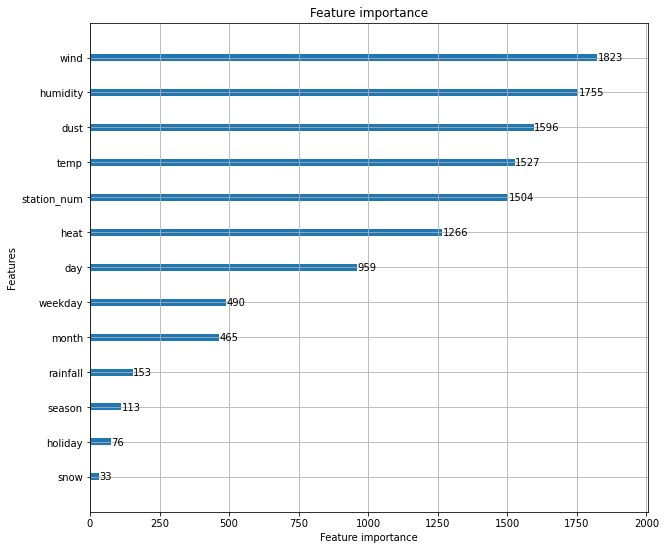

In [ ]:
jamsil_lgbm, jamsil_test, jamsil_pred = train_predict(jamsil_mean)

Train Score | 0.9666721806235058
RMSE | 9.340673571119027
RMSLE | inf
R2 score | 0.8783934319516357


<ipython-input-127-8061865fd436>:9: RuntimeWarning: divide by zero encountered in log1p
  log_y = np.log1p(y)
<ipython-input-127-8061865fd436>:9: RuntimeWarning: invalid value encountered in log1p
  log_y = np.log1p(y)


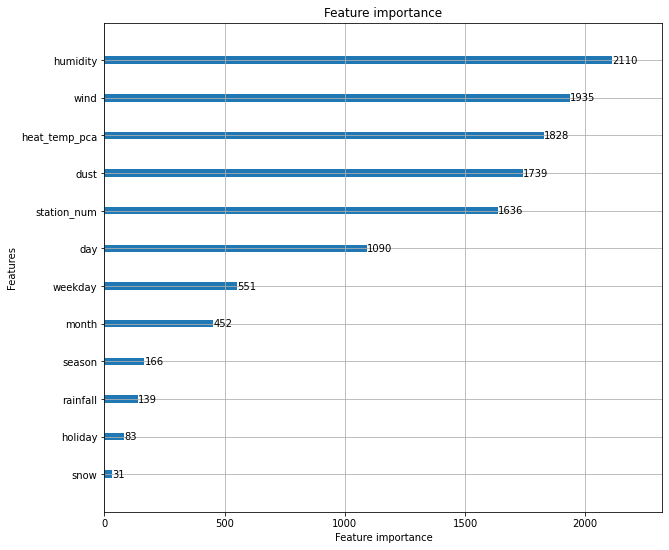

In [ ]:
jamsil_lgbm, jamsil_test, jamsil_pred = train_predict(jamsil_pca)

In [ ]:
jamsil_result = pd.DataFrame()
jamsil_result['station_num'] = jamsil_test['station_num']
jamsil_result['month'] = jamsil_test['month']
jamsil_result['day'] = jamsil_test['day']
jamsil_result['holiday'] = jamsil_test['holiday']

jamsil_result['pred'] = jamsil_pred
jamsil_result['target'] = jamsil_pca['target']
jamsil_result['error'] = np.abs(jamsil_result['pred'] - jamsil_result['target'])
jamsil_result = jamsil_result.sort_values(by='error', ascending=False)
jamsil_result.head()

,station_num,month,day,holiday,pred,target,error
5587,2613,5,19,1,132,204,72
1570,1222,4,28,0,166,232,66
5693,2613,9,2,0,139,202,63
2423,1231,9,2,0,124,170,46
7509,2646,9,2,0,121,165,44


In [ ]:
jamsil_info = jamsil[['station_num','station_name']].drop_duplicates().sort_values(by='station_num').drop([184495,184496,184961,69,50])
jamsil_info.head(5)

,station_num,station_name
20,1205,종합운동장역 4번출구
294,1206,9호선종합운동장역 9번출구
116,1220,잠실근린공원
146,1221,삼전역 4번출구
68,1222,잠실새내역 5번 출구 뒤


In [ ]:
jamsil_result = pd.merge(jamsil_result,jamsil_info, how='left', left_on='station_num', right_on='station_num')
jamsil_result.head(10)

,station_num,month,day,holiday,pred,target,error,station_name
0,2613,5,19,1,132,204,72,잠실나들목
1,1222,4,28,0,166,232,66,잠실새내역 5번 출구 뒤
2,2613,9,2,0,139,202,63,잠실나들목
3,1231,9,2,0,124,170,46,잠실역 6번출구
4,2646,9,2,0,121,165,44,레이크펠리스101동앞
5,1235,6,5,1,48,85,37,잠실트리지움310동 옆
6,2613,9,21,1,79,116,37,잠실나들목
7,4483,9,18,1,86,122,36,잠실나들목4
8,1220,4,28,0,124,160,36,잠실근린공원
9,2613,10,10,1,67,32,35,잠실나들목


Train Score | 0.9754110366961268
RMSE | 12.10917657466303
RMSLE | inf
R2 score | 0.8981258379890487


<ipython-input-127-8061865fd436>:9: RuntimeWarning: divide by zero encountered in log1p
  log_y = np.log1p(y)
<ipython-input-127-8061865fd436>:9: RuntimeWarning: invalid value encountered in log1p
  log_y = np.log1p(y)


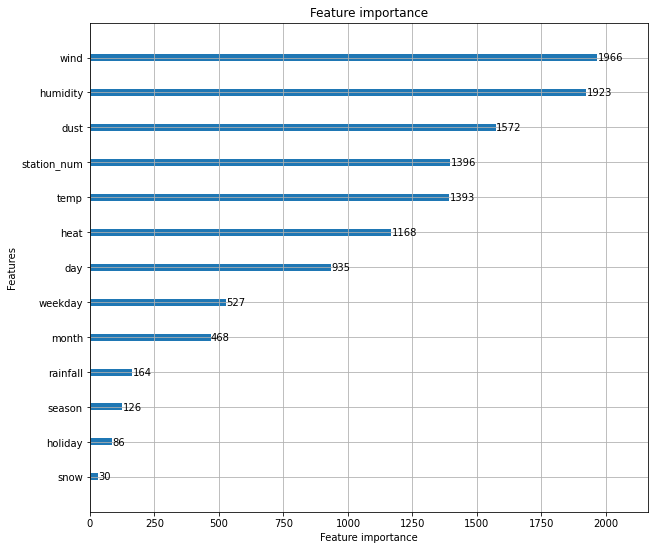

In [ ]:
bangyi_lgbm, bangyi_test, bangyi_pred = train_predict(bangyi_mean)

Train Score | 0.9747140074547898
RMSE | 12.108054095245652
RMSLE | inf
R2 score | 0.8981447238892271


<ipython-input-127-8061865fd436>:9: RuntimeWarning: divide by zero encountered in log1p
  log_y = np.log1p(y)
<ipython-input-127-8061865fd436>:9: RuntimeWarning: invalid value encountered in log1p
  log_y = np.log1p(y)


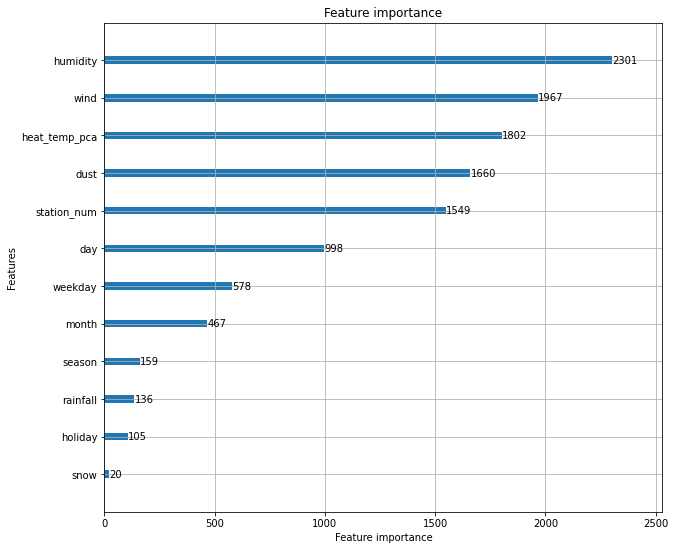

In [ ]:
bangyi_lgbm, bangyi_test, bangyi_pred = train_predict(bangyi_pca)

In [ ]:
bangyi_result = pd.DataFrame()
bangyi_result['station_num'] = bangyi_test['station_num']
bangyi_result['month'] = bangyi_test['month']
bangyi_result['day'] = bangyi_test['day']
bangyi_result['holiday'] = bangyi_test['holiday']

bangyi_result['pred'] = bangyi_pred
bangyi_result['target'] = bangyi_pca['target']
bangyi_result['error'] = np.abs(bangyi_result['pred'] - bangyi_result['target'])
bangyi_result = bangyi_result.sort_values(by='error', ascending=False)
bangyi_result.head()

,station_num,month,day,holiday,pred,target,error
4743,2622,3,27,1,134,233,99
4725,2622,3,9,0,102,186,84
4782,2622,5,5,1,196,279,83
1916,1268,4,11,1,125,205,80
4933,2622,10,3,1,197,275,78


In [ ]:
bangyi_info = bangyi[['station_num','station_name']].drop_duplicates().sort_values(by='station_num')

In [ ]:
bangyi_result = pd.merge(bangyi_result,bangyi_info, how='left', left_on='station_num', right_on='station_num')
bangyi_result.head(10)

,station_num,month,day,holiday,pred,target,error,station_name
0,2622,3,27,1,134,233,99,올림픽공원역 3번출구
1,2622,3,9,0,102,186,84,올림픽공원역 3번출구
2,2622,5,5,1,196,279,83,올림픽공원역 3번출구
3,1268,4,11,1,125,205,80,몽촌토성역 1번출구 옆
4,2622,10,3,1,197,275,78,올림픽공원역 3번출구
5,2620,5,20,0,119,48,71,송파나루역 4번 출구옆
6,2622,4,11,1,166,235,69,올림픽공원역 3번출구
7,2622,9,25,1,177,241,64,올림픽공원역 3번출구
8,1268,10,31,1,109,170,61,몽촌토성역 1번출구 옆
9,1268,5,9,1,157,217,60,몽촌토성역 1번출구 옆
